In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sb

In [ ]:
# база данных об удовлетворённости работой сотрудников 
df = pd.read_csv('HR.csv', 'r', delimiter = ',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [ ]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


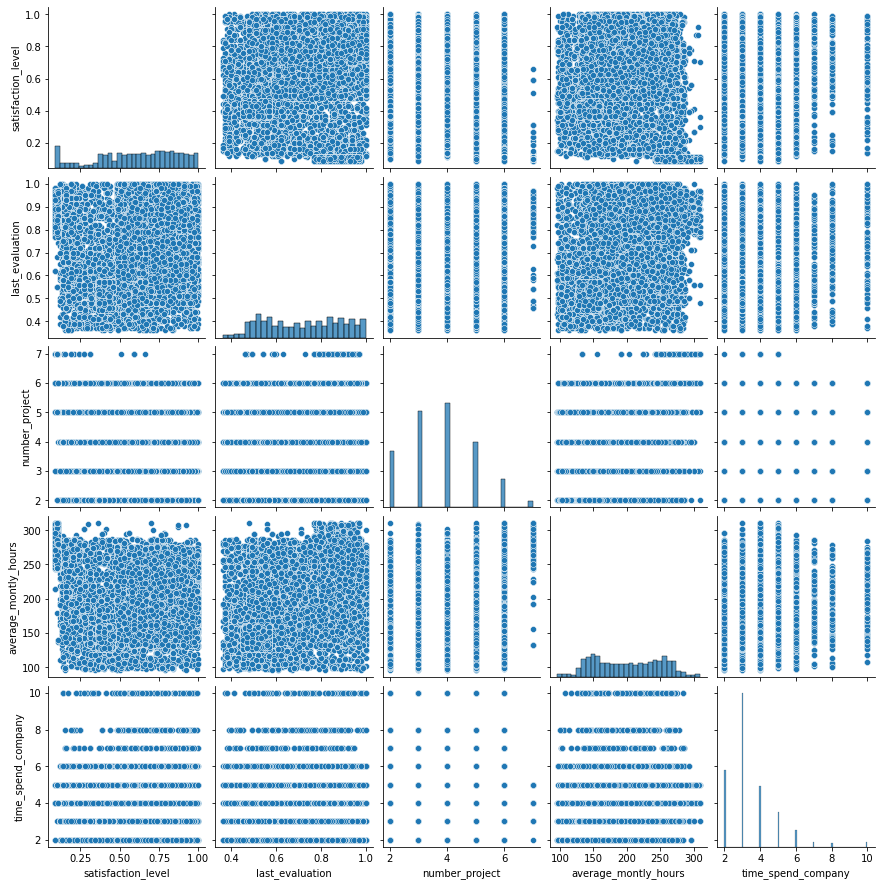

In [ ]:
sb.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

'\nнаименьшая корреляция между уровнем удовлетворения и количеством проектов, наибольшая - между средним от количества рабочих часов и количеством проектов\n'

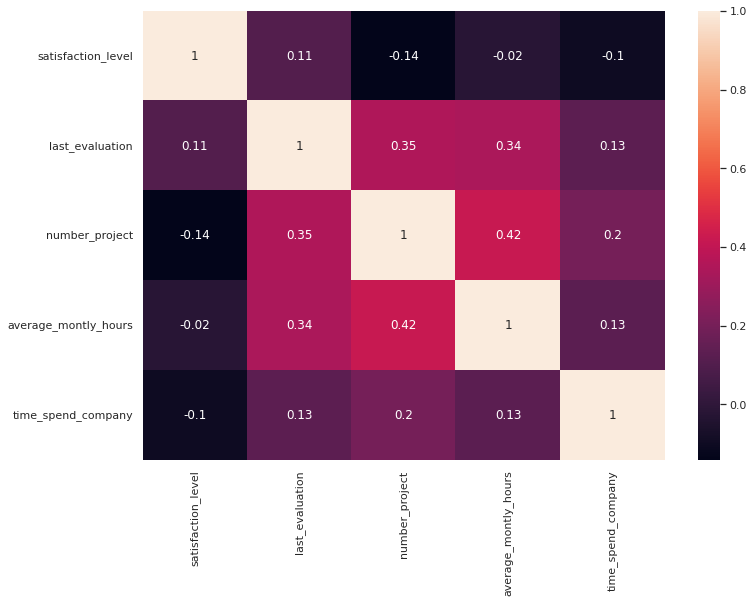

In [ ]:
# визуализация корреляционной матрицы для всеъ возможных факторов
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot=True)
"""
наименьшая корреляция между уровнем удовлетворения и количеством проектов, наибольшая - между средним от количества рабочих часов и количеством проектов
"""

In [ ]:
df.groupby('department').size()
# количество сотрудников в каждом департаменте

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

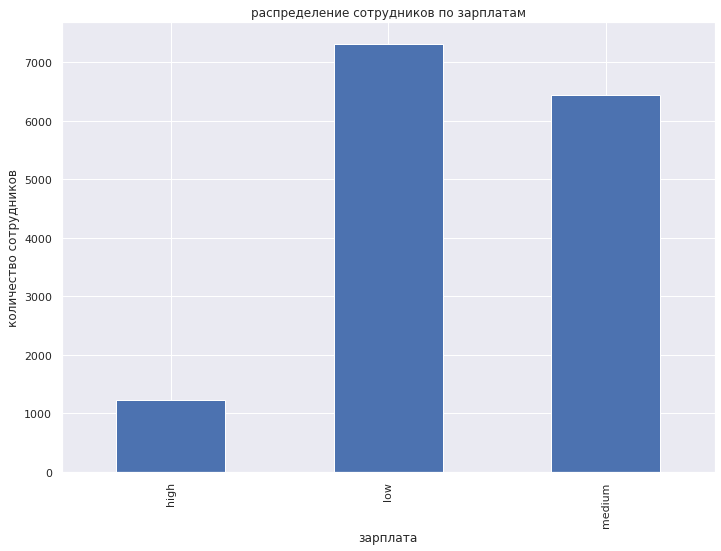

In [ ]:
# визуализированное распределение сотрудников по зарплатам
df.groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')

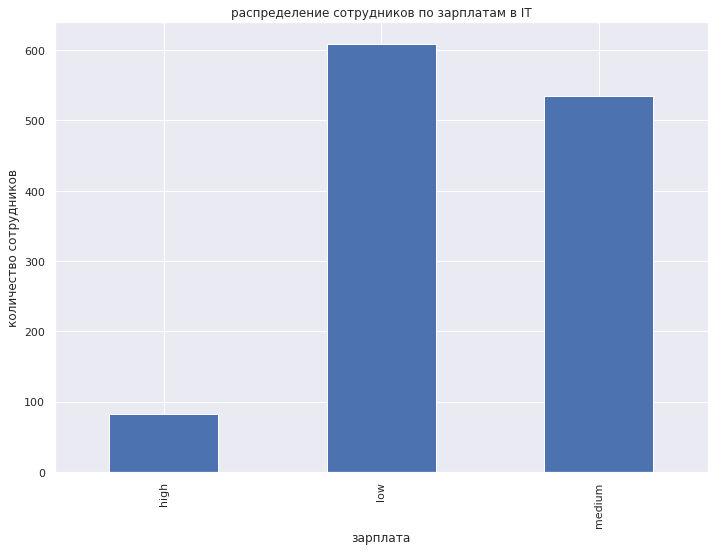

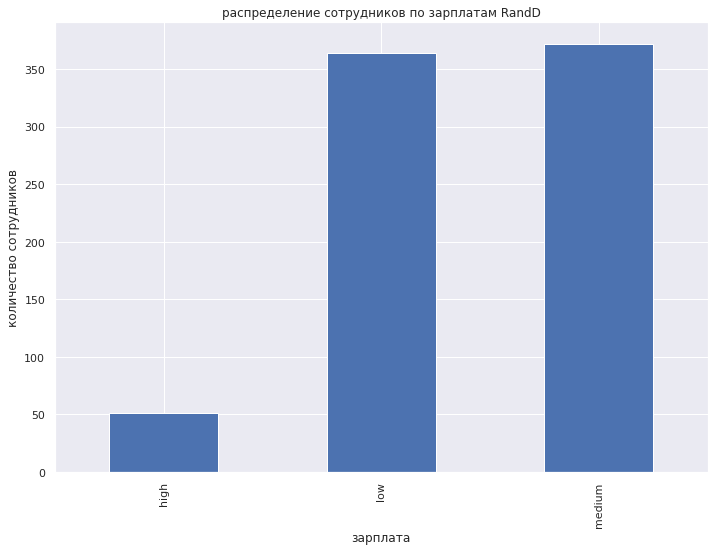

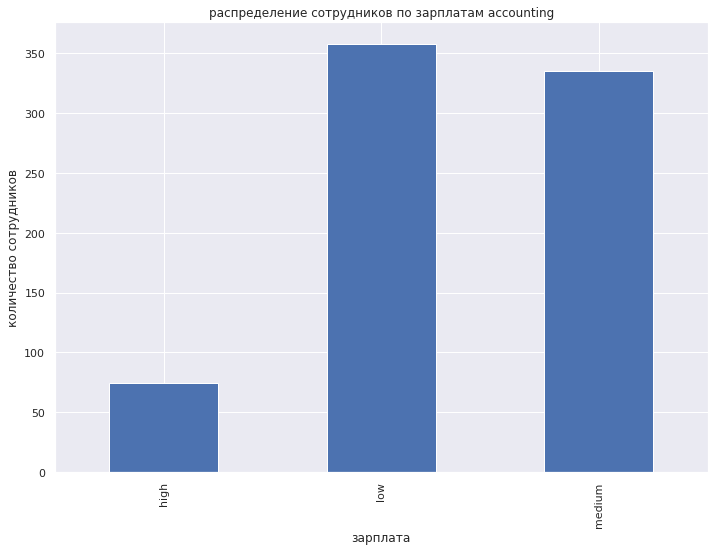

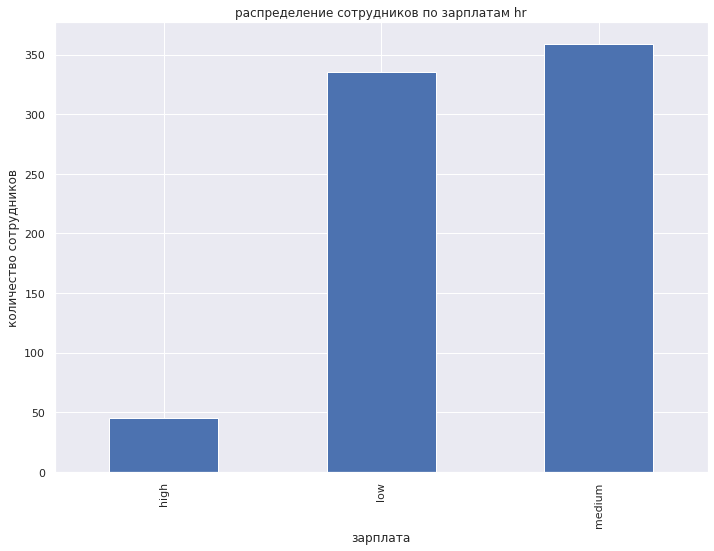

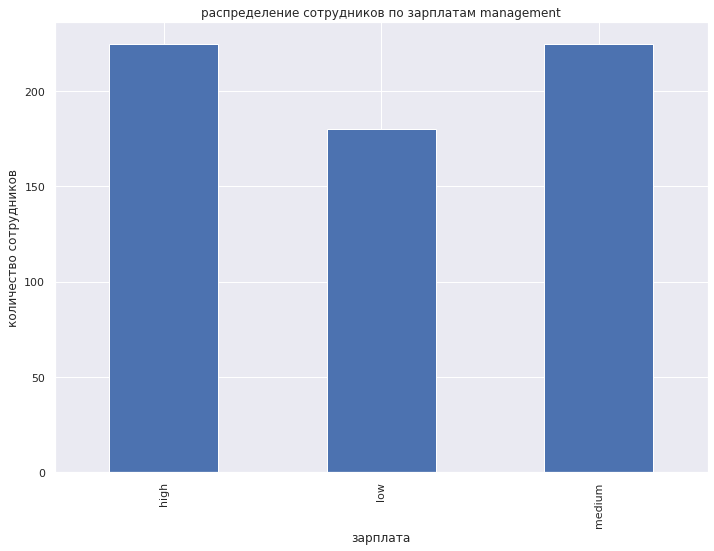

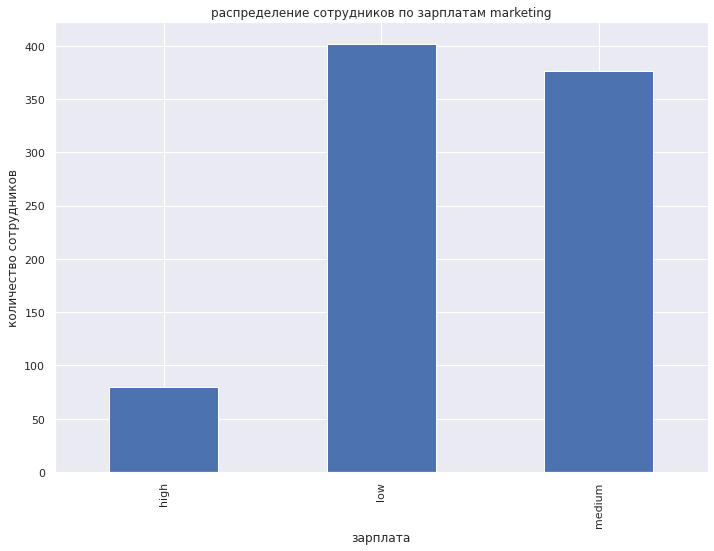

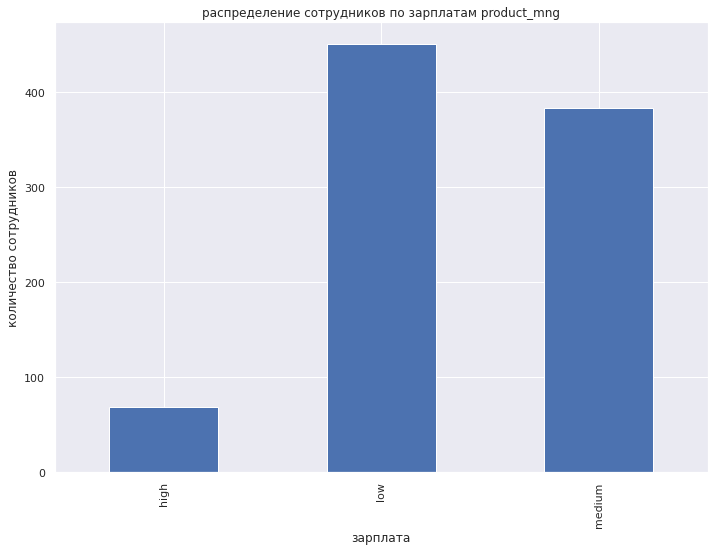

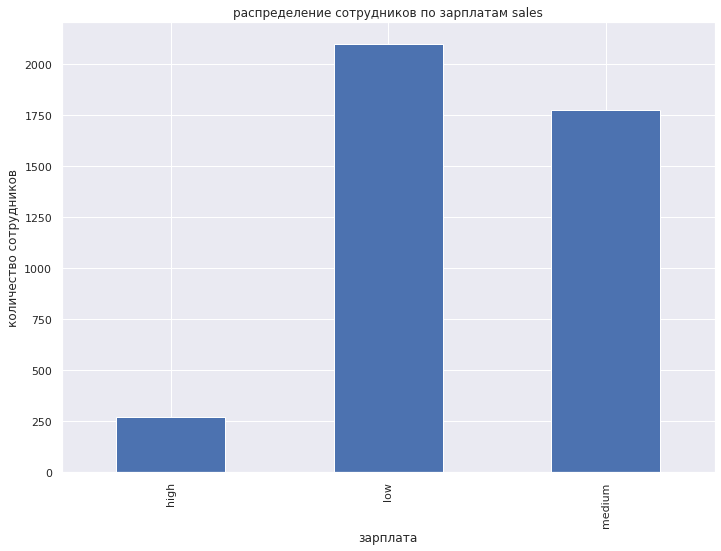

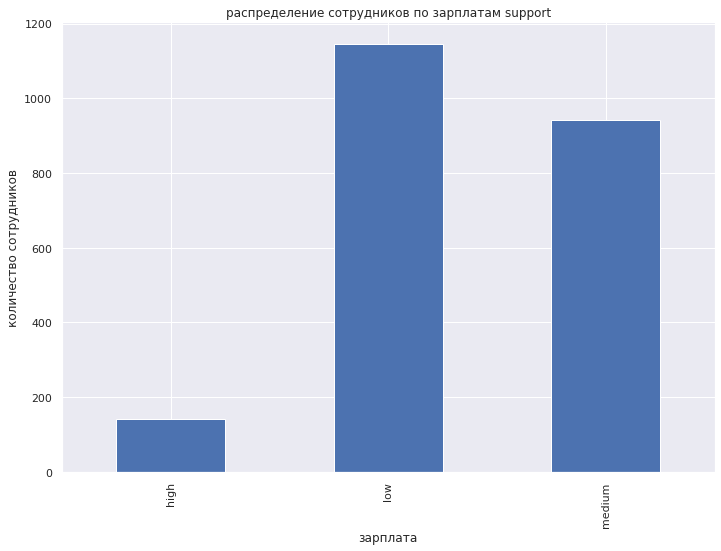

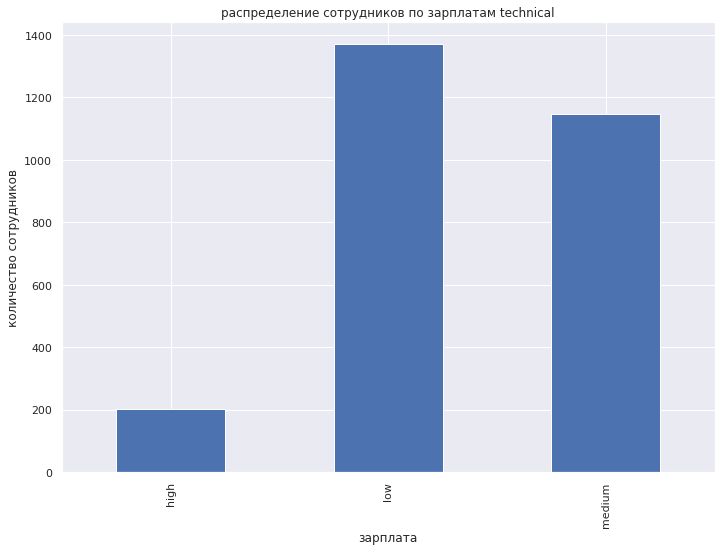

In [ ]:
# визуализированное распределение сотрудников по зарплатам в каждом департаменте отдельно

df.loc[df['department'] == 'IT'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам в IT',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'RandD'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам RandD',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'accounting'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам accounting',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'hr'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам hr',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'management'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам management',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'marketing'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам marketing',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'product_mng'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам product_mng',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'sales'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам sales',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'support'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам support',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')
plt.show()
df.loc[df['department'] == 'technical'].groupby('salary').size().plot(kind='bar', 
                                 title='распределение сотрудников по зарплатам technical',
                                 xlabel='зарплата',
                                 ylabel='количество сотрудников')

H0 - сотрудники с меньшим окладом проводят больше времени на работе, чем сотрудники с высоким

H1 - сотрудники с меньшим окладом проводят меньше времени на работе, чем сотрудники с высоким

In [ ]:
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

In [ ]:

tvalue, pvalue = stats.ttest_ind(high_salary_hours, low_salary_hours)
print(tvalue, pvalue)

-0.7288680398062308 0.4661023478267259


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[  46.,   80.,  181.,  186.,  142.,  165.,  160.,  178.,   91.,
            8.],
        [ 164.,  635., 1407.,  823.,  746.,  804.,  892., 1083.,  559.,
          203.]]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 2 Lists of Patches objects>)

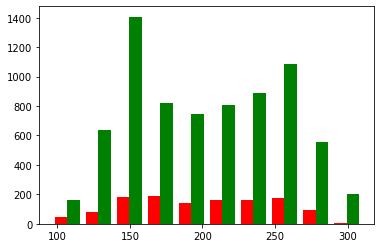

In [ ]:
plt.hist([high_salary_hours, low_salary_hours], color=['r','g'])

Уволившиеся сотрудники

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [ ]:
df_fired = df[df['left'] == 1]
(df_fired[df_fired['promotion_last_5years'] == 1].count()) / (df_fired[df_fired['promotion_last_5years'] == 0].count())

satisfaction_level       0.005349
last_evaluation          0.005349
number_project           0.005349
average_montly_hours     0.005349
time_spend_company       0.005349
Work_accident            0.005349
left                     0.005349
promotion_last_5years    0.005349
department               0.005349
salary                   0.005349
dtype: float64

In [ ]:
df_fired['satisfaction_level'].mean()

0.44009801176140917

In [ ]:
df_fired['number_project'].median()

4.0

Не уволившиеся сотрудники

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [ ]:
df_non_fired = df[df['left'] == 0]
(df_non_fired[df_non_fired['promotion_last_5years'] == 1].count()) / (df_non_fired[df_non_fired['promotion_last_5years'] == 0].count())

satisfaction_level       0.026959
last_evaluation          0.026959
number_project           0.026959
average_montly_hours     0.026959
time_spend_company       0.026959
Work_accident            0.026959
left                     0.026959
promotion_last_5years    0.026959
department               0.026959
salary                   0.026959
dtype: float64

In [ ]:
df_non_fired['satisfaction_level'].mean()

0.666809590479516

In [ ]:
df_non_fired['number_project'].median()

4.0

In [ ]:
# разделить данные на тестовую и обучающую выборки,
# строю модель LDA, предсказывающую, уволился лисотрудник на основе имеющихся факторов (кроме department и salary), оцениваю качество модели на тестовой выборки
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
x = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.7557777777777778

In [ ]:
result = pd.DataFrame([y_test, lda.predict(x_test)]).T.fillna(0)
result

,left,Unnamed 0
6723,0.0,0.0
6473,0.0,0.0
4679,0.0,0.0
862,1.0,1.0
7286,0.0,0.0
...,...,...
13388,0.0,0.0
10463,0.0,0.0
5331,0.0,0.0
7499,0.0,0.0
